In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Read in data
air = pd.read_csv('../data/air_quality/nyc_airqual_by_cd.csv')
air.rename(columns={'Unnamed: 0': 'CD'}, inplace=True)
air.set_index('CD', inplace=True)

all_data = gpd.read_file('../data/complete_data/trees_income_2017.shp')
# Rename columns
untruncate = {'TD_Car_05-':'TD_Car_05-16Chg',
                   'TD_Truck_0':'TD_Truck_05-16Chg', 
                   'TD_Vehicle':'TD_Vehicle_05-16Chg', 
                   'Summ_FPM_0':'Summ_FPM_09-17Chg', 
                   'Wint_FPM_0':'Wint_FPM_09-17Chg',
                   'Summ_NO2_0':'Summ_NO2_09-17Chg', 
                   'Wint_NO2_0':'Wint_NO2_09-17Chg', 
                   'SO2_09-16C':'SO2_09-16Chg',
                   'O3_09-17Ch':'O3_09-17Chg',
                  'tree_cou_1': 'tree_count_05',
                  'tree_den_1': 'tree_density_05',
                'n_species_': 'n_species_05',
             'treecount_':'tree_count_chg', 
              'tree_densi':'tree_density',
              'treedens_c': 'tree_dens_chg', 
              'nspecies_c': 'n_species_chg',
              '05_TD_Vehi': '05_TD_Vehicle',
              '16_TD_Vehi': '16_TD_Vehicle',
              '05_TD_Truc': '05_TD_Truck',
              '16_TD_Truc': '16_TD_Truck',
              'health_goo': 'health_good',
              'health_poo': 'health_poor',
              'health_non': 'health_none',
              'health_fai': 'health_fair',
              'mean_tree_': 'mean_tree_diameter'
             }
all_data.rename(columns=untruncate, inplace=True)

# Tree Profile EDA

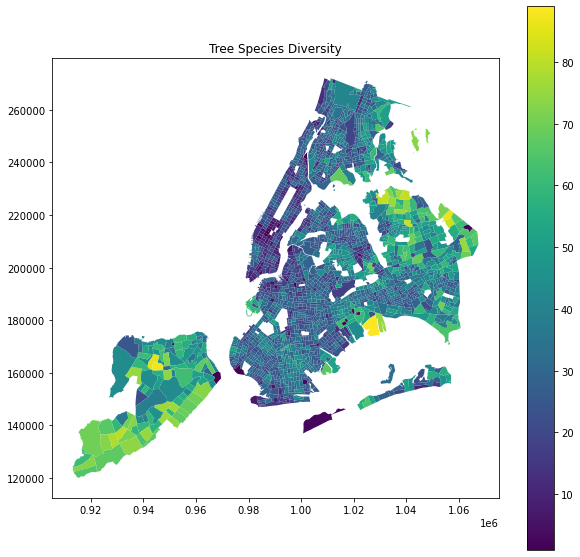

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Tree Species Diversity')
all_data.plot(ax=ax, column='n_species', vmin=all_data['n_species'].min(), vmax=all_data['n_species'].max(), legend=True);

<AxesSubplot:title={'center':'Pct of trees in good health (subjective) by census tract'}>

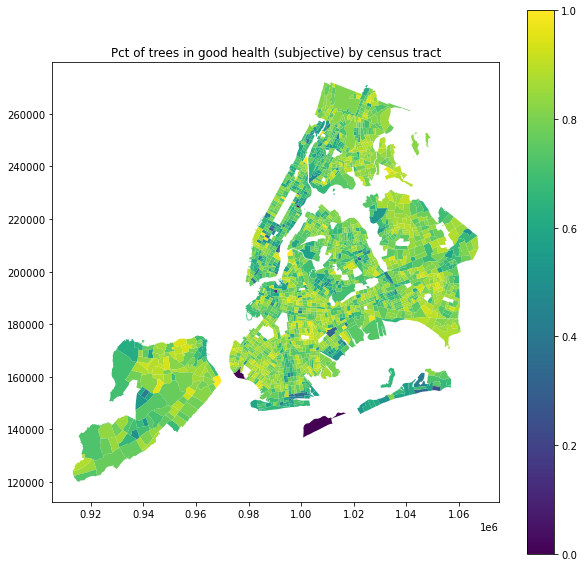

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Pct of trees in good health (subjective) by census tract')
all_data.plot(ax=ax, column='health_good', vmin=min(all_data['health_good']), vmax=max(all_data['health_good']), legend=True)

<AxesSubplot:>

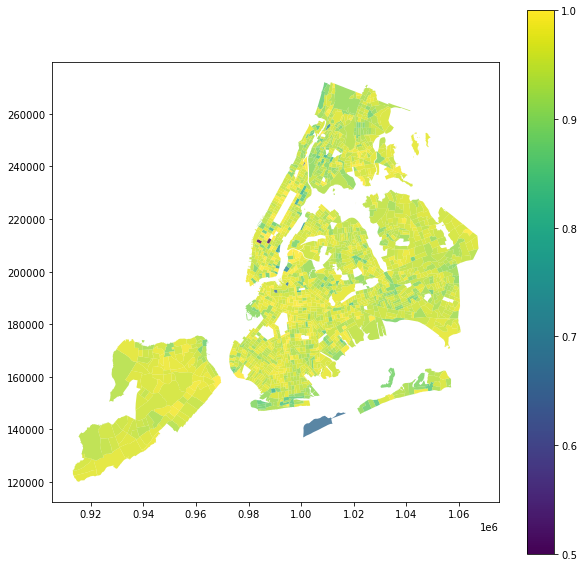

In [11]:
# alive/dead
fig, ax = plt.subplots(figsize=(10,10))
all_data.plot(column='alive', ax=ax, markersize=.25, alpha=.8, legend=True)

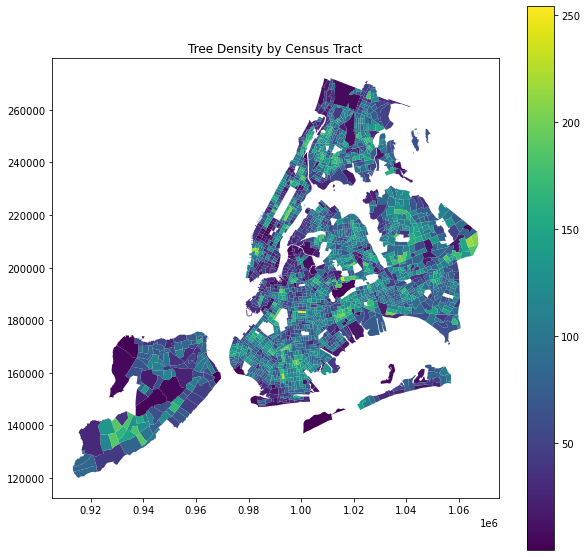

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Tree Density by Census Tract')
all_data.plot(ax=ax, column='tree_density', vmin=all_data['tree_density'].min(), vmax=all_data['tree_density'].max(), legend=True);

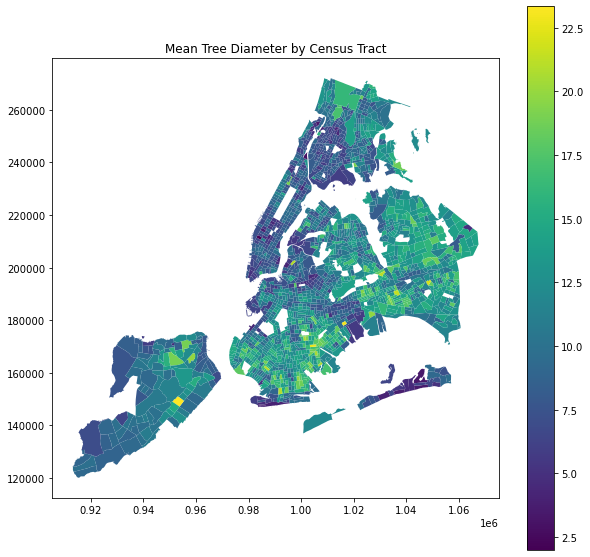

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Mean Tree Diameter by Census Tract')
all_data.plot(ax=ax, column='mean_tree_diameter', vmin=all_data['mean_tree_diameter'].min(), vmax=all_data['mean_tree_diameter'].max(), legend=True);

# Income EDA

In [ ]:
all_data['hh_income'].hist()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Median household income by census tract')
all_data.plot(ax=ax, column='hh_income', vmin=min(all_data['hh_income']), vmax=max(all_data['hh_income']), legend=True)

# Air Quality EDA

In [ ]:
air.columns

In [13]:
# Grab groups of columns
summer_fpm_cols = sorted([x for x in air.columns if x.endswith('Summer_FPM')])
winter_fpm_cols = sorted([x for x in air.columns if x.endswith('Winter_FPM')])

summer_no2_cols = sorted([x for x in air.columns if x.endswith('Summer_NO2')])
winter_no2_cols = sorted([x for x in air.columns if x.endswith('Winter_NO2')])

ozone_cols = sorted([x for x in air.columns if x.endswith('_O3')])

so2_cols = sorted([x for x in air.columns if x.endswith('_SO2')])

In [ ]:
#https://stackoverflow.com/questions/28752727/map-values-to-colors-in-matplotlib

#minima = 101
#maxima =112
#norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

### Fine Particulate Matter

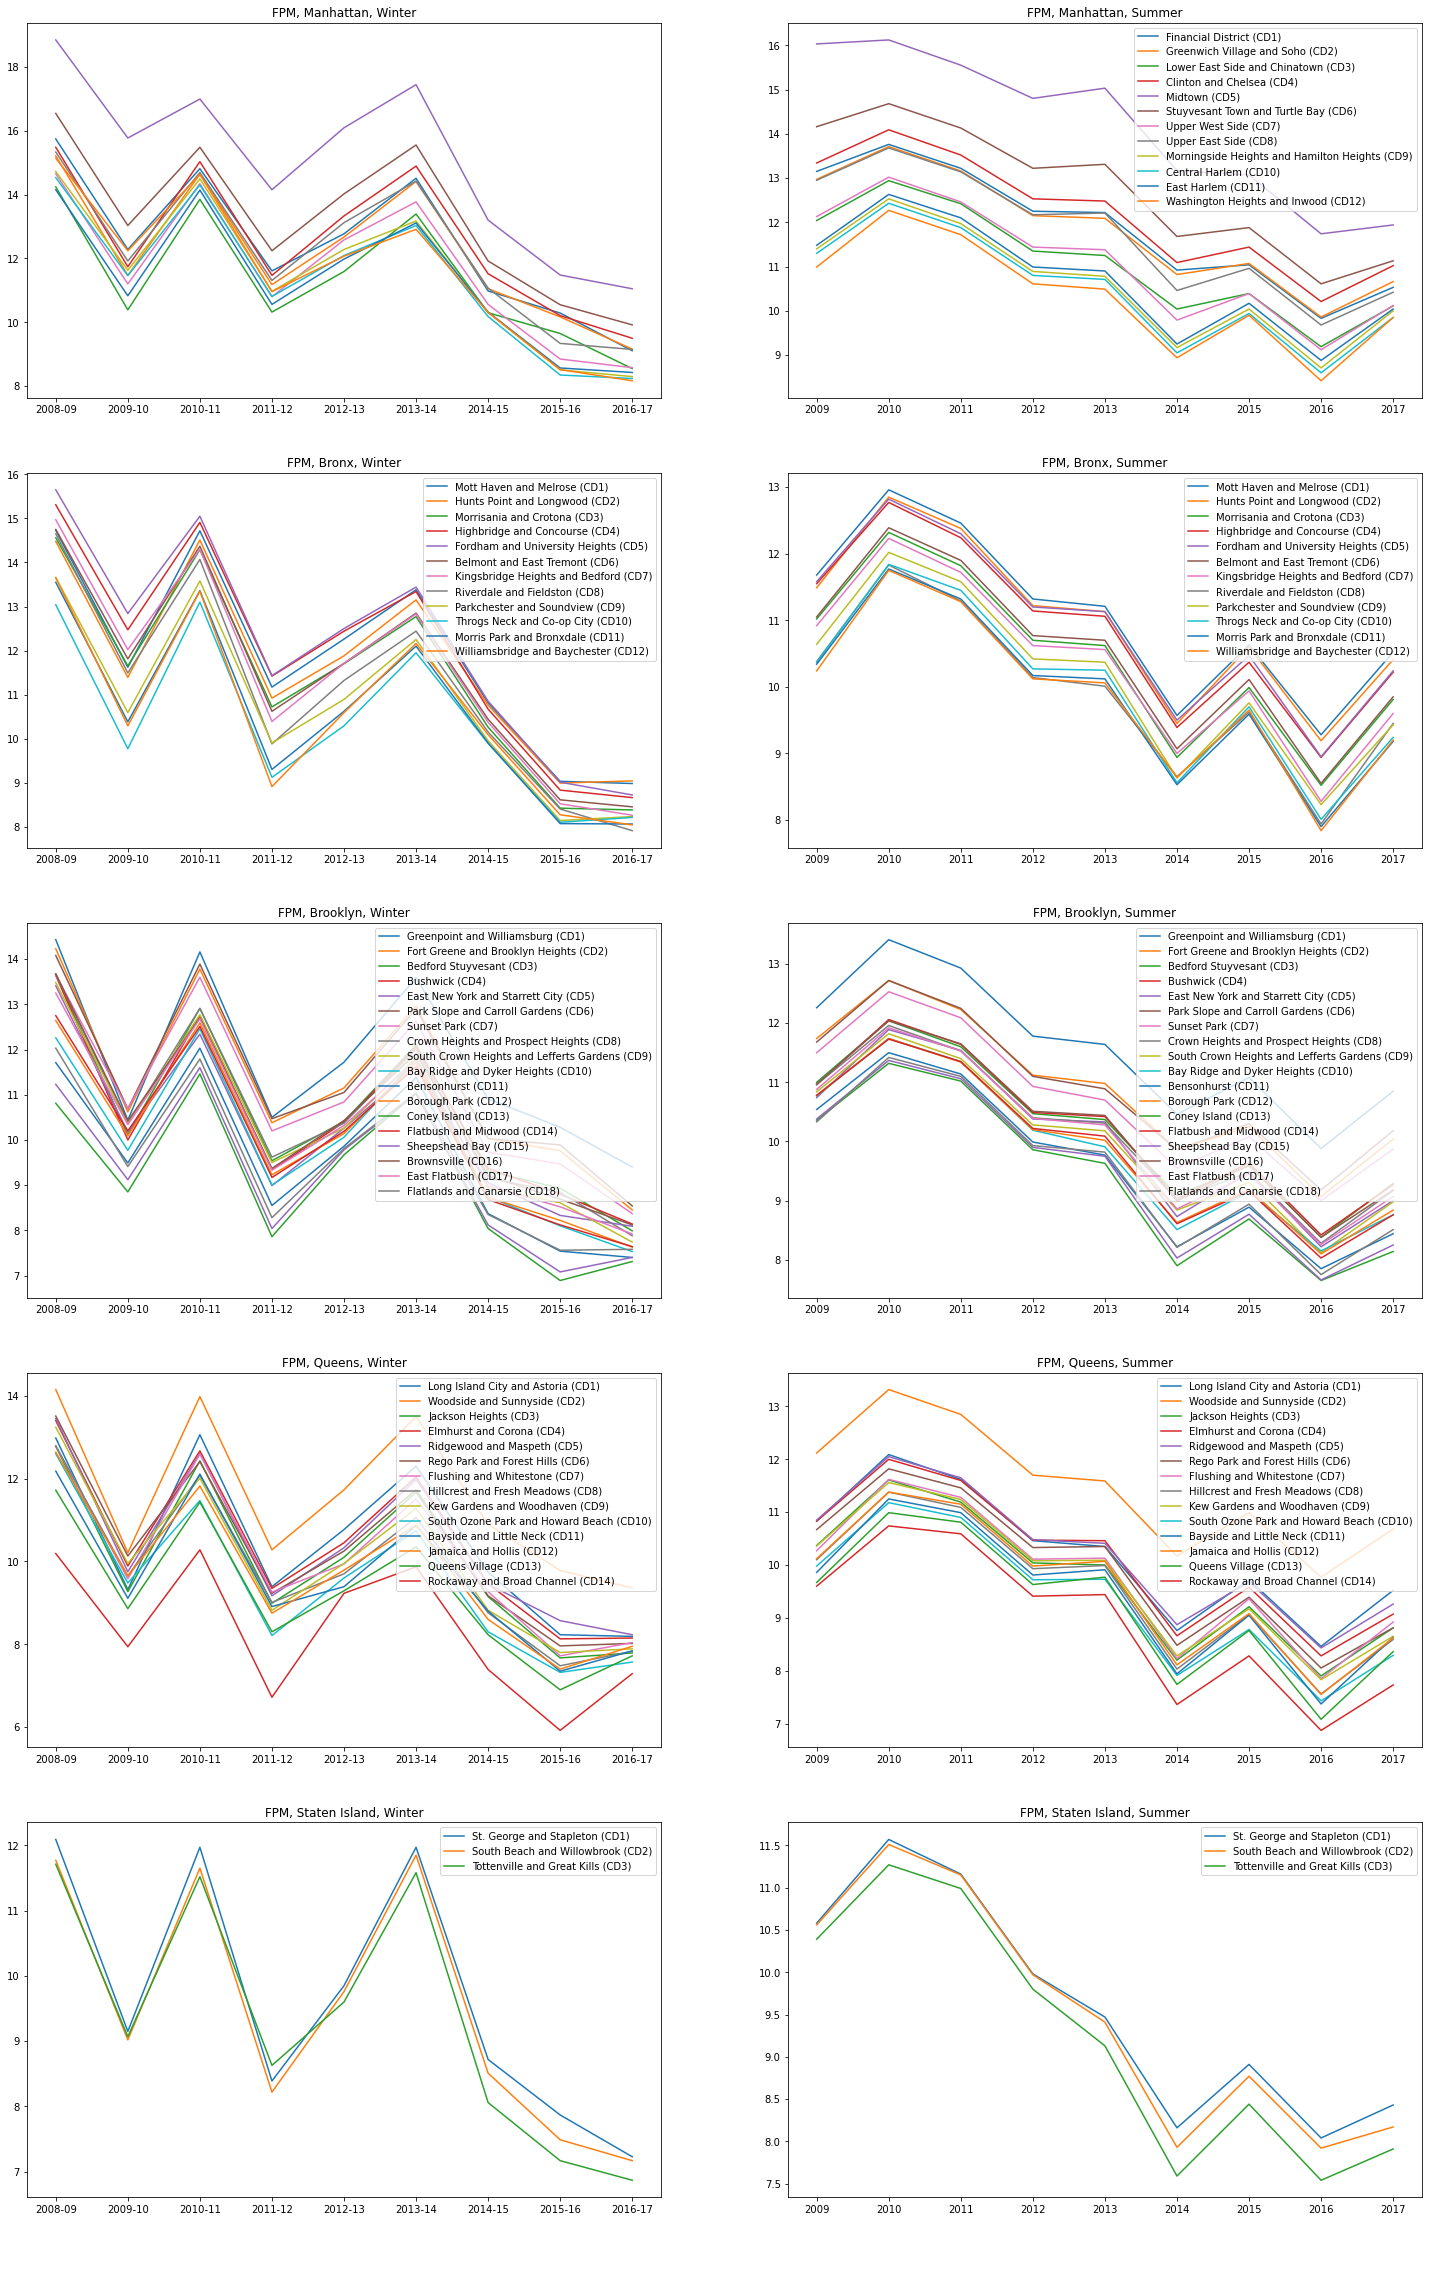

In [22]:
# Manhattan
plt.figure(figsize=(25,40))
ax1 = plt.subplot(521)
ax1.set_title('FPM, Manhattan, Winter')
for cd in range(101,113):
    ax1.plot(winter_fpm_cols, air.loc[cd, winter_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax1.set_xticks(ticks=winter_fpm_cols)
    ax1.set_xticklabels([x.split(' ')[0] for x in winter_fpm_cols])
    ax1.legend()
    
ax2 = plt.subplot(522)
ax2.set_title('FPM, Manhattan, Summer')
for cd in range(101,113):
    ax2.plot(summer_fpm_cols, air.loc[cd, summer_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax2.set_xticks(ticks=summer_fpm_cols)
    ax2.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax2.legend()
    
# Bronx
ax3 = plt.subplot(523)
ax3.set_title('FPM, Bronx, Winter')
for cd in range(201,213):
    ax3.plot(winter_fpm_cols, air.loc[cd, winter_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax3.set_xticks(ticks=winter_fpm_cols)
    ax3.set_xticklabels([x.split(' ')[0] for x in winter_fpm_cols])
    ax3.legend()
    
ax4 = plt.subplot(524)
ax4.set_title('FPM, Bronx, Summer')
for cd in range(201,213):
    ax4.plot(summer_fpm_cols, air.loc[cd, summer_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax4.set_xticks(ticks=summer_fpm_cols)
    ax4.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax4.legend()
    
# Brooklyn
ax5 = plt.subplot(525)
ax5.set_title('FPM, Brooklyn, Winter')
for cd in range(301,319):
    ax5.plot(winter_fpm_cols, air.loc[cd, winter_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax5.set_xticks(ticks=winter_fpm_cols)
    ax5.set_xticklabels([x.split(' ')[0] for x in winter_fpm_cols])
    ax5.legend()
    
ax6 = plt.subplot(526)
ax6.set_title('FPM, Brooklyn, Summer')
for cd in range(301,319):
    ax6.plot(summer_fpm_cols, air.loc[cd, summer_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax6.set_xticks(ticks=summer_fpm_cols)
    ax6.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax6.legend()
    
#Queens
ax7 = plt.subplot(527)
ax7.set_title('FPM, Queens, Winter')
for cd in range(401,415):
    ax7.plot(winter_fpm_cols, air.loc[cd, winter_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax7.set_xticks(ticks=winter_fpm_cols)
    ax7.set_xticklabels([x.split(' ')[0] for x in winter_fpm_cols])
    ax7.legend()
    
ax8 = plt.subplot(528)
ax8.set_title('FPM, Queens, Summer')
for cd in range(401,415):
    ax8.plot(summer_fpm_cols, air.loc[cd, summer_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax8.set_xticks(ticks=summer_fpm_cols)
    ax8.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax8.legend()
    
# Staten Island
ax9 = plt.subplot(529)
ax9.set_title('FPM, Staten Island, Winter')
for cd in range(501,504):
    ax9.plot(winter_fpm_cols, air.loc[cd, winter_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax9.set_xticks(ticks=winter_fpm_cols)
    ax9.set_xticklabels([x.split(' ')[0] for x in winter_fpm_cols])
    ax9.legend()
    
ax10 = plt.subplot(5, 2, 10)
ax10.set_title('FPM, Staten Island, Summer')
for cd in range(501,504):
    ax10.plot(summer_fpm_cols, air.loc[cd, summer_fpm_cols].values, label=air.loc[cd, 'CD_Name'])
    ax10.set_xticks(ticks=summer_fpm_cols)
    ax10.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax10.legend();

## NO2

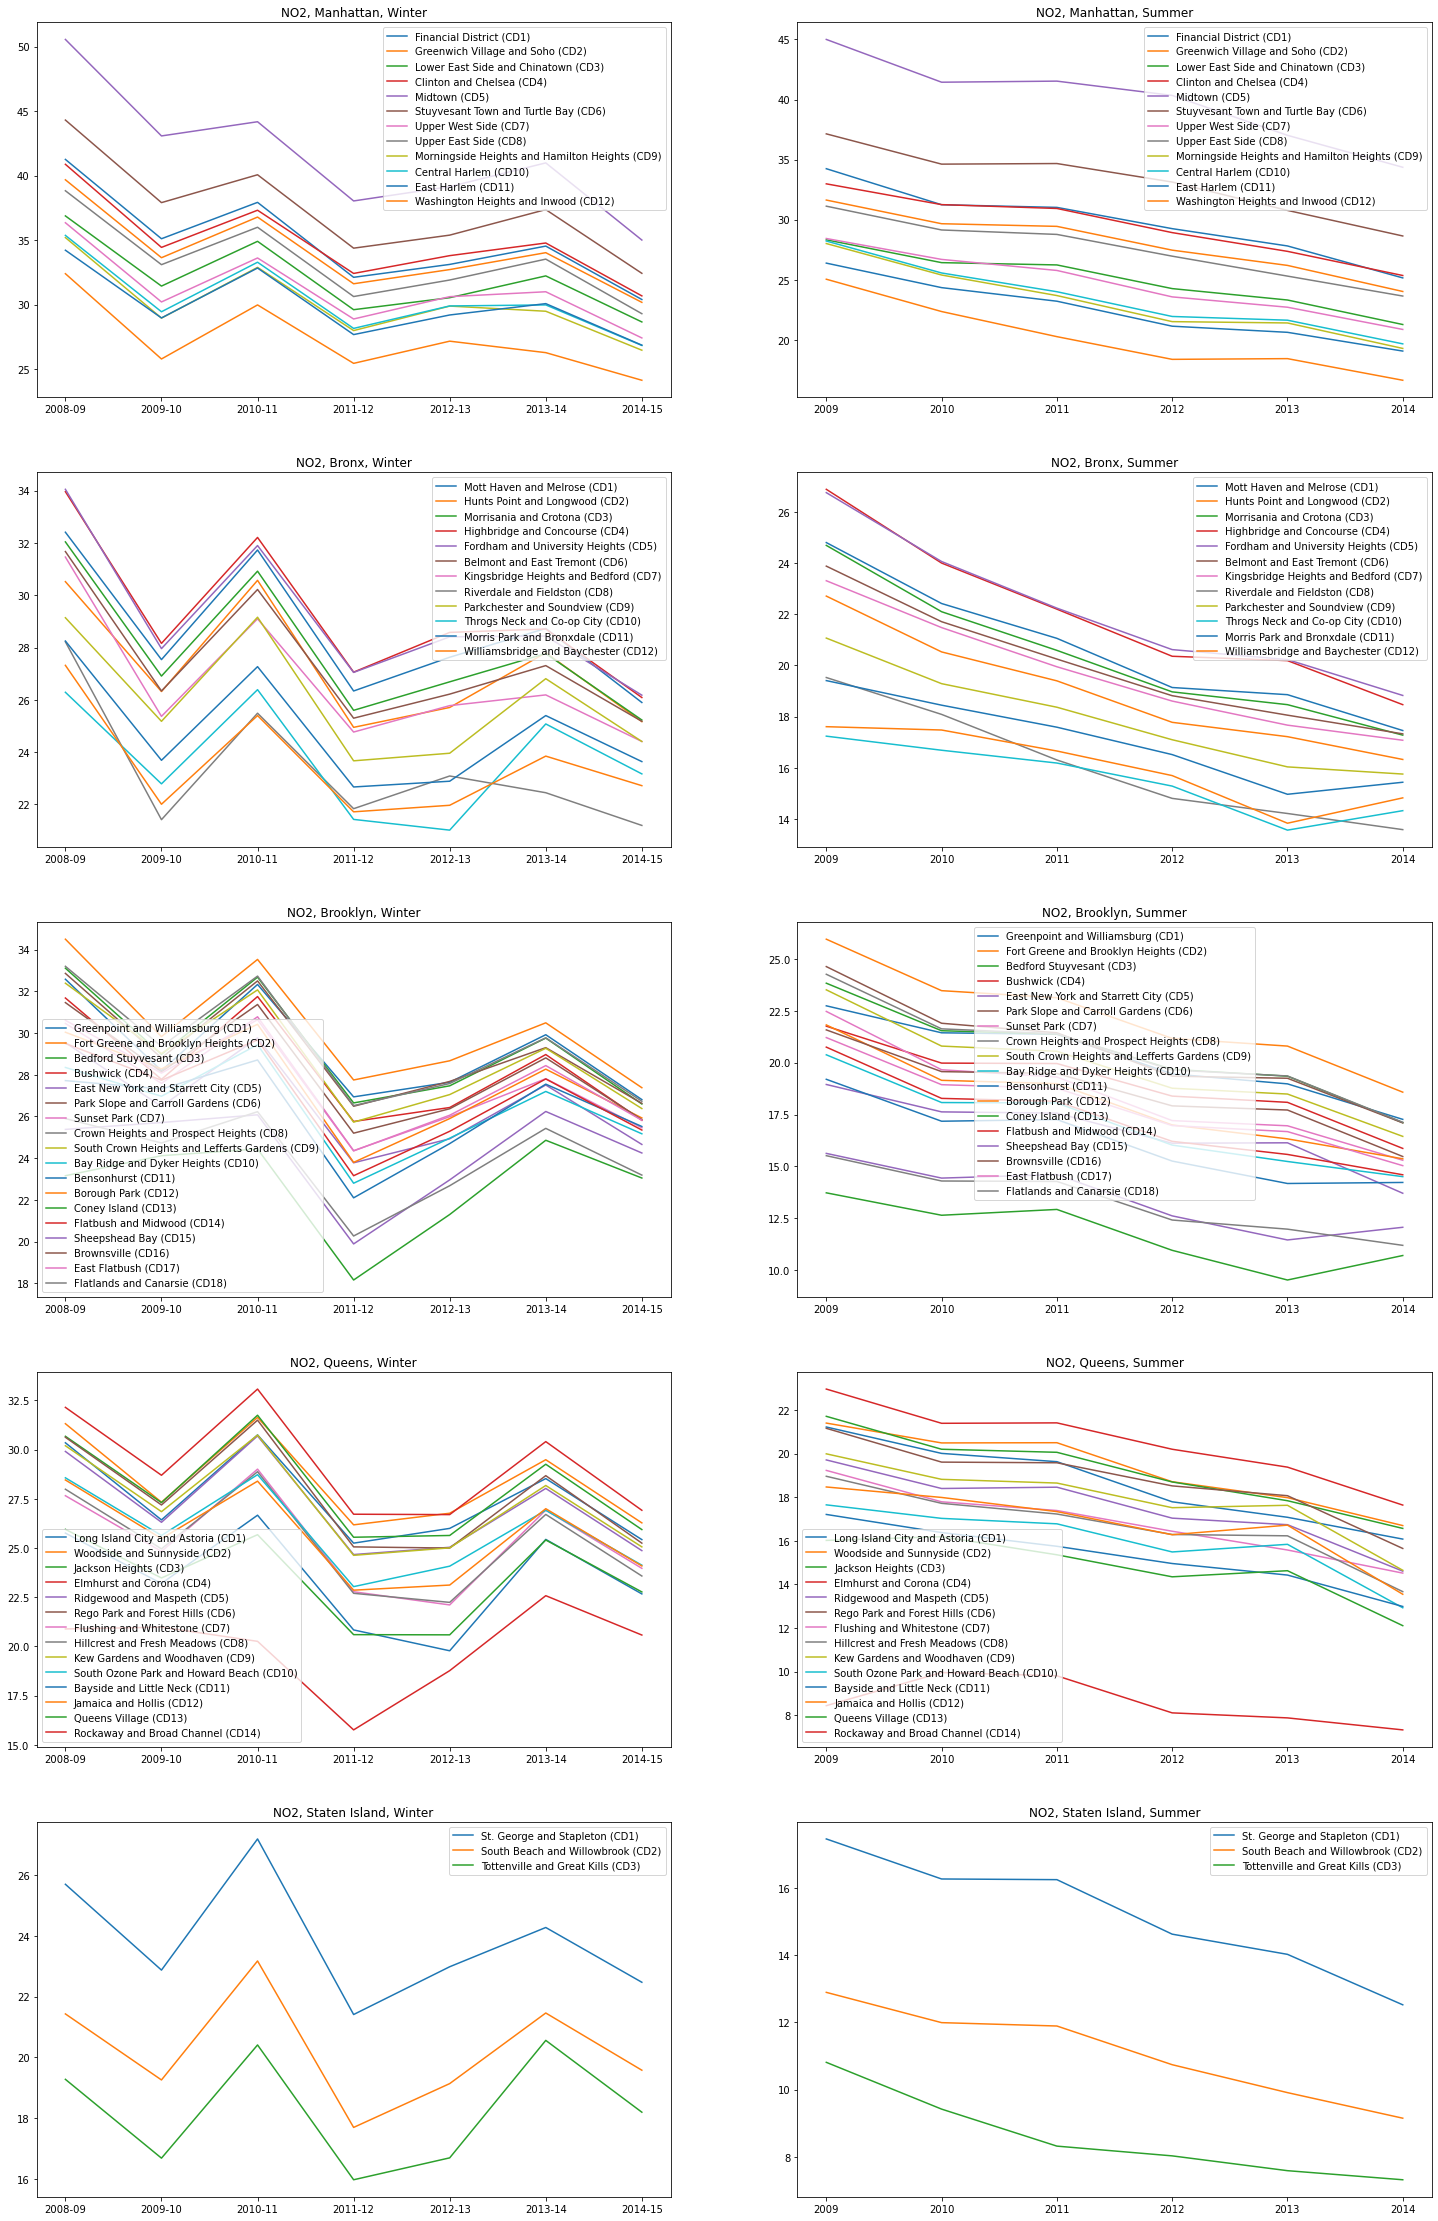

In [73]:
# Manhattan
plt.figure(figsize=(25,40))
ax1 = plt.subplot(521)
ax1.set_title('NO2, Manhattan, Winter')
for cd in range(101,113):
    ax1.plot(winter_no2_cols, air.loc[cd, winter_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax1.set_xticks(ticks=winter_no2_cols)
    ax1.set_xticklabels([x.split(' ')[0] for x in winter_no2_cols])
    ax1.legend()
    
ax2 = plt.subplot(522)
ax2.set_title('NO2, Manhattan, Summer')
for cd in range(101,113):
    ax2.plot(summer_no2_cols, air.loc[cd, summer_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax2.set_xticks(ticks=summer_no2_cols)
    ax2.set_xticklabels([x.split(' ')[0] for x in summer_no2_cols])
    ax2.legend()
    
# Bronx
ax3 = plt.subplot(523)
ax3.set_title('NO2, Bronx, Winter')
for cd in range(201,213):
    ax3.plot(winter_no2_cols, air.loc[cd, winter_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax3.set_xticks(ticks=winter_no2_cols)
    ax3.set_xticklabels([x.split(' ')[0] for x in winter_no2_cols])
    ax3.legend()
    
ax4 = plt.subplot(524)
ax4.set_title('NO2, Bronx, Summer')
for cd in range(201,213):
    ax4.plot(summer_no2_cols, air.loc[cd, summer_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax4.set_xticks(ticks=summer_no2_cols)
    ax4.set_xticklabels([x.split(' ')[0] for x in summer_fpm_cols])
    ax4.legend()
    
# Brooklyn
ax5 = plt.subplot(525)
ax5.set_title('NO2, Brooklyn, Winter')
for cd in range(301,319):
    ax5.plot(winter_no2_cols, air.loc[cd, winter_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax5.set_xticks(ticks=winter_no2_cols)
    ax5.set_xticklabels([x.split(' ')[0] for x in winter_no2_cols])
    ax5.legend()
    
ax6 = plt.subplot(526)
ax6.set_title('NO2, Brooklyn, Summer')
for cd in range(301,319):
    ax6.plot(summer_no2_cols, air.loc[cd, summer_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax6.set_xticks(ticks=summer_no2_cols)
    ax6.set_xticklabels([x.split(' ')[0] for x in summer_no2_cols])
    ax6.legend()
    
#Queens
ax7 = plt.subplot(527)
ax7.set_title('NO2, Queens, Winter')
for cd in range(401,415):
    ax7.plot(winter_no2_cols, air.loc[cd, winter_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax7.set_xticks(ticks=winter_no2_cols)
    ax7.set_xticklabels([x.split(' ')[0] for x in winter_no2_cols])
    ax7.legend()
    
ax8 = plt.subplot(528)
ax8.set_title('NO2, Queens, Summer')
for cd in range(401,415):
    ax8.plot(summer_no2_cols, air.loc[cd, summer_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax8.set_xticks(ticks=summer_no2_cols)
    ax8.set_xticklabels([x.split(' ')[0] for x in summer_no2_cols])
    ax8.legend()
    
# Staten Island
ax9 = plt.subplot(529)
ax9.set_title('NO2, Staten Island, Winter')
for cd in range(501,504):
    ax9.plot(winter_no2_cols, air.loc[cd, winter_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax9.set_xticks(ticks=winter_no2_cols)
    ax9.set_xticklabels([x.split(' ')[0] for x in winter_no2_cols])
    ax9.legend()
    
ax10 = plt.subplot(5, 2, 10)
ax10.set_title('NO2, Staten Island, Summer')
for cd in range(501,504):
    ax10.plot(summer_no2_cols, air.loc[cd, summer_no2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax10.set_xticks(ticks=summer_no2_cols)
    ax10.set_xticklabels([x.split(' ')[0] for x in summer_no2_cols])
    ax10.legend();

## Ozone

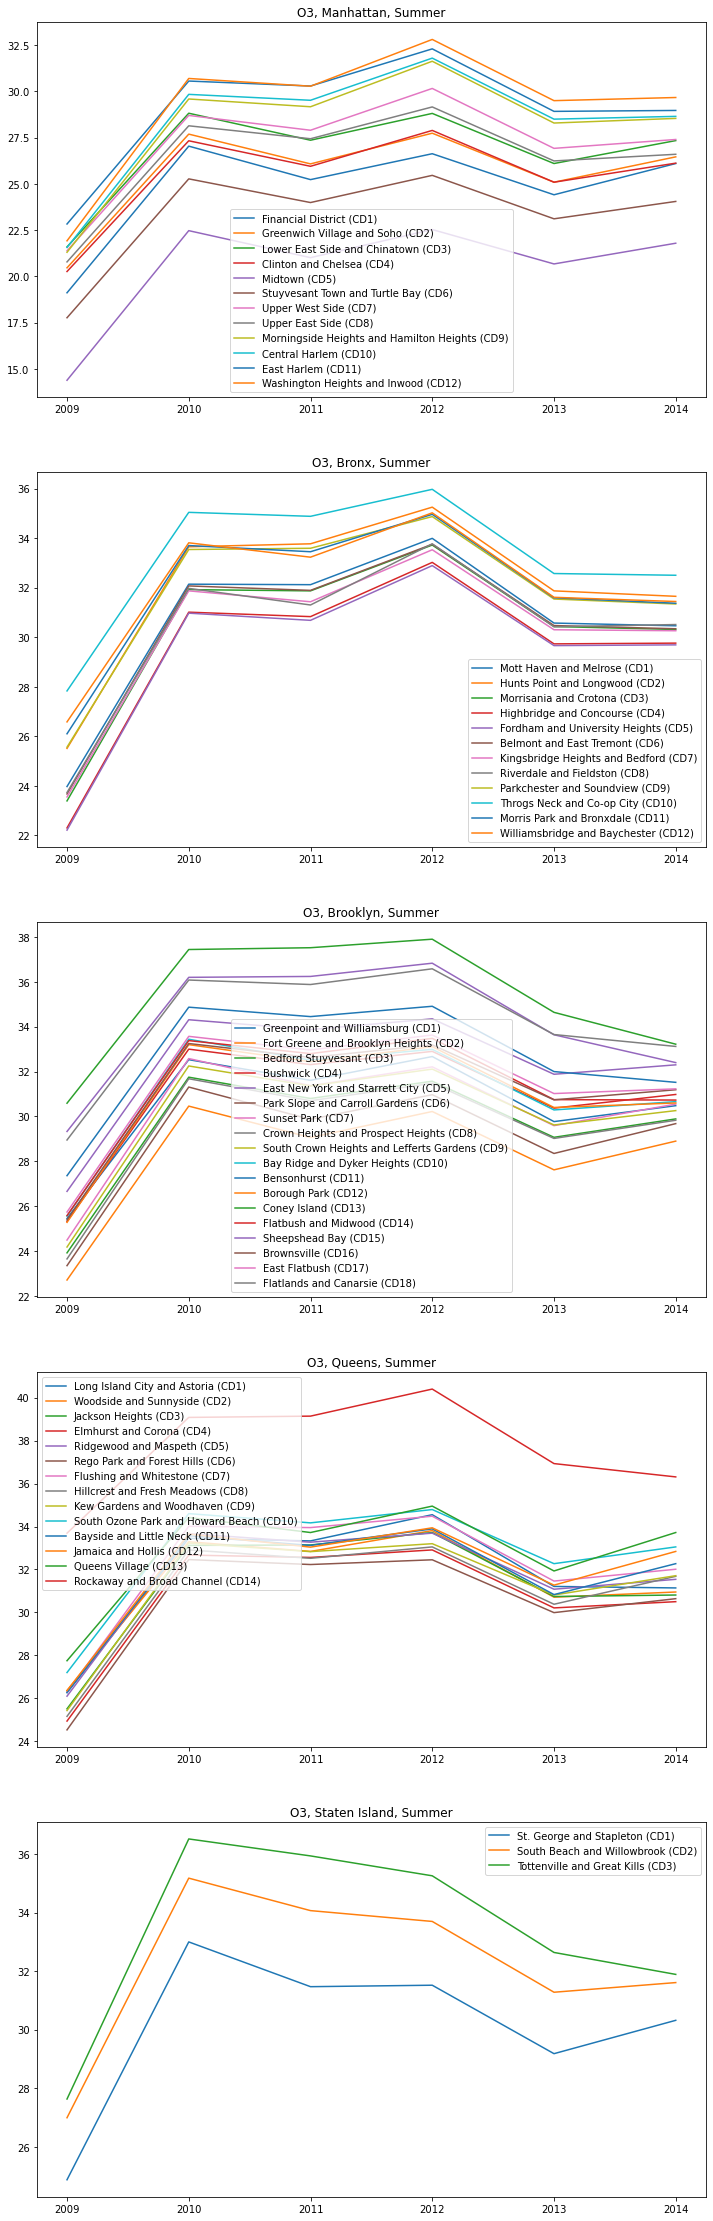

In [74]:
# Manhattan
plt.figure(figsize=(12,40))
ax1 = plt.subplot(511)
ax1.set_title('O3, Manhattan, Summer')
for cd in range(101,113):
    ax1.plot(ozone_cols, air.loc[cd, ozone_cols].values, label=air.loc[cd, 'CD_Name'])
    ax1.set_xticks(ticks=ozone_cols)
    ax1.set_xticklabels([x.split(' ')[0] for x in ozone_cols])
    ax1.legend()
    
# Bronx
ax3 = plt.subplot(512)
ax3.set_title('O3, Bronx, Summer')
for cd in range(201,213):
    ax3.plot(ozone_cols, air.loc[cd, ozone_cols].values, label=air.loc[cd, 'CD_Name'])
    ax3.set_xticks(ticks=ozone_cols)
    ax3.set_xticklabels([x.split(' ')[0] for x in ozone_cols])
    ax3.legend()

# Brooklyn
ax5 = plt.subplot(513)
ax5.set_title('O3, Brooklyn, Summer')
for cd in range(301,319):
    ax5.plot(ozone_cols, air.loc[cd, ozone_cols].values, label=air.loc[cd, 'CD_Name'])
    ax5.set_xticks(ticks=ozone_cols)
    ax5.set_xticklabels([x.split(' ')[0] for x in ozone_cols])
    ax5.legend()
    
#Queens
ax7 = plt.subplot(514)
ax7.set_title('O3, Queens, Summer')
for cd in range(401,415):
    ax7.plot(ozone_cols, air.loc[cd, ozone_cols].values, label=air.loc[cd, 'CD_Name'])
    ax7.set_xticks(ticks=ozone_cols)
    ax7.set_xticklabels([x.split(' ')[0] for x in ozone_cols])
    ax7.legend()
    
# Staten Island
ax9 = plt.subplot(515)
ax9.set_title('O3, Staten Island, Summer')
for cd in range(501,504):
    ax9.plot(ozone_cols, air.loc[cd, ozone_cols].values, label=air.loc[cd, 'CD_Name'])
    ax9.set_xticks(ticks=ozone_cols)
    ax9.set_xticklabels([x.split(' ')[0] for x in ozone_cols])
    ax9.legend();

## SO3

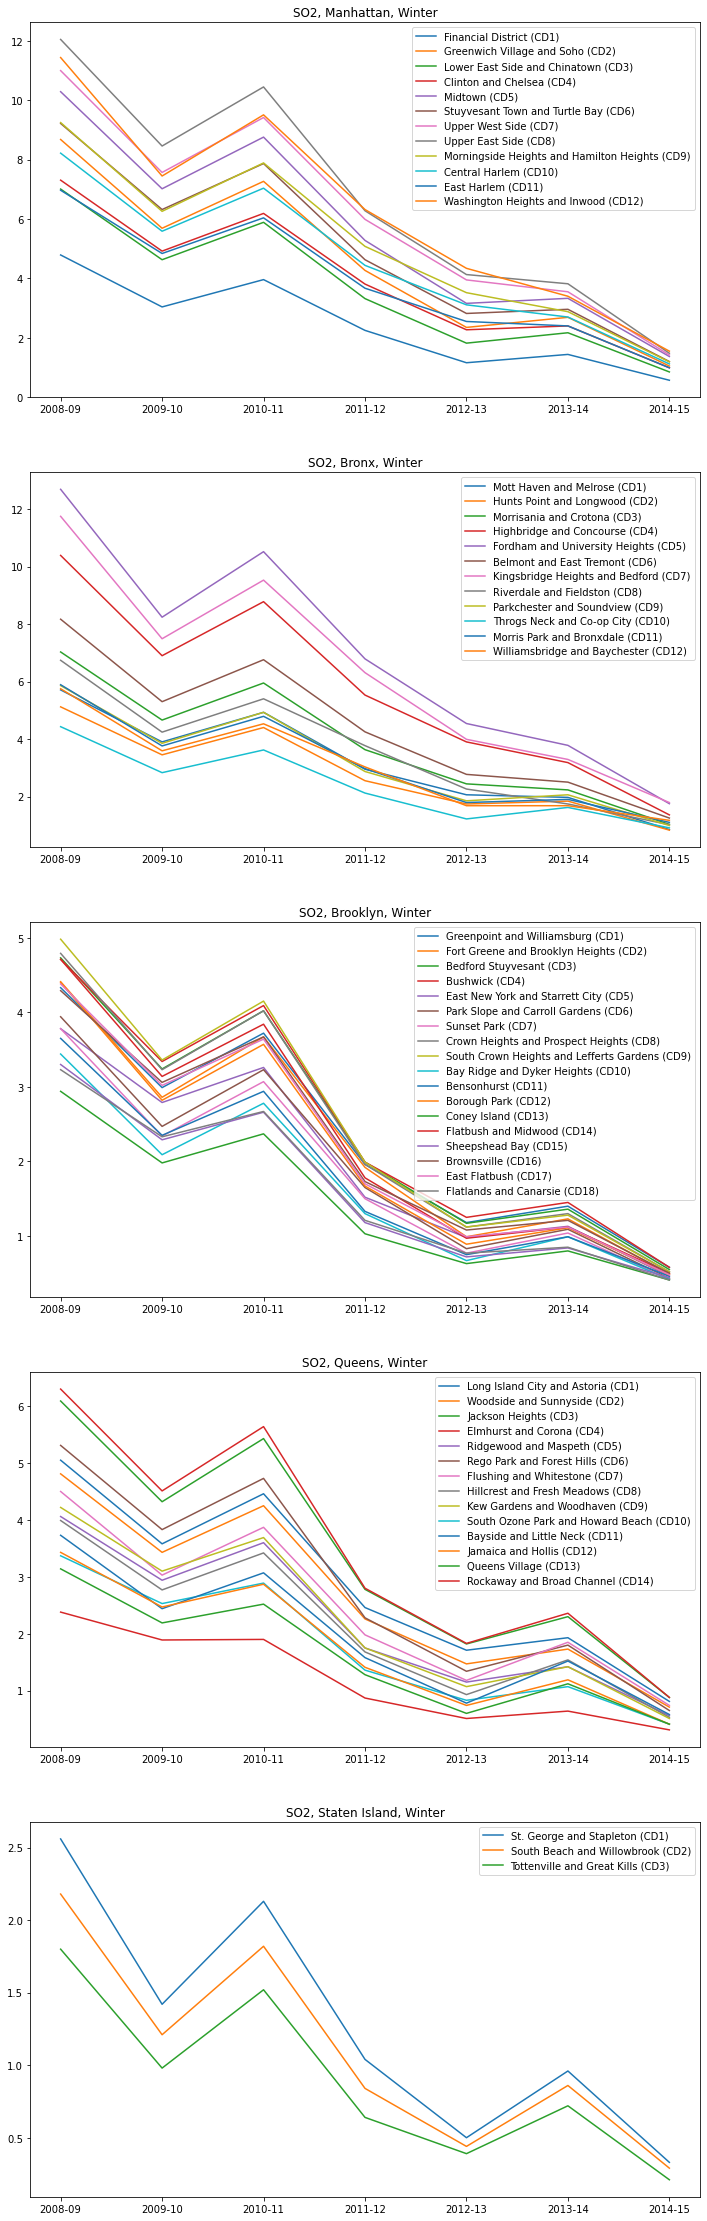

In [75]:
# Manhattan
plt.figure(figsize=(12,40))
ax1 = plt.subplot(511)
ax1.set_title('SO2, Manhattan, Winter')
for cd in range(101,113):
    ax1.plot(so2_cols, air.loc[cd, so2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax1.set_xticks(ticks=so2_cols)
    ax1.set_xticklabels([x.split(' ')[0] for x in so2_cols])
    ax1.legend()
    
# Bronx
ax3 = plt.subplot(512)
ax3.set_title('SO2, Bronx, Winter')
for cd in range(201,213):
    ax3.plot(so2_cols, air.loc[cd, so2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax3.set_xticks(ticks=so2_cols)
    ax3.set_xticklabels([x.split(' ')[0] for x in so2_cols])
    ax3.legend()

# Brooklyn
ax5 = plt.subplot(513)
ax5.set_title('SO2, Brooklyn, Winter')
for cd in range(301,319):
    ax5.plot(so2_cols, air.loc[cd, so2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax5.set_xticks(ticks=so2_cols)
    ax5.set_xticklabels([x.split(' ')[0] for x in so2_cols])
    ax5.legend()
    
#Queens
ax7 = plt.subplot(514)
ax7.set_title('SO2, Queens, Winter')
for cd in range(401,415):
    ax7.plot(so2_cols, air.loc[cd, so2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax7.set_xticks(ticks=so2_cols)
    ax7.set_xticklabels([x.split(' ')[0] for x in so2_cols])
    ax7.legend()
    
# Staten Island
ax9 = plt.subplot(515)
ax9.set_title('SO2, Staten Island, Winter')
for cd in range(501,504):
    ax9.plot(so2_cols, air.loc[cd, so2_cols].values, label=air.loc[cd, 'CD_Name'])
    ax9.set_xticks(ticks=so2_cols)
    ax9.set_xticklabels([x.split(' ')[0] for x in so2_cols])
    ax9.legend();